## Social Networks Assignment

We begin with some of the notation introduced in the text.

$$
   \begin{array}[t]{llp{5in}}
   d(i,j)     &  &\text{the length of the shortest path between nodes $i$ and $j$}\\
  \text{N}_{j} &  & \text{the (set of) neighbors of node $j$}\\
   \mid \text{N}_{j} \mid &  & \text{the number of neighbors node $j$ has in the graph}\\
   \text{E}(\text{S}) &  & \text{the set of edges for some set of nodes S}\\
   \text{E}(\text{N}_{j}) & & \text{the set of edges among the neighbors of $j$}\\
   \mid \text{E}(\text{N}_{j})\mid & & \text{the number of edges among the neighbors of $j$}\\
   {k \choose 2} &  \frac{k(k-1)}{2} & \text{the number of possible pairs for a set of $k$ things} \\[.05in]
   {\mid \text{N}_{j} \mid \choose 2} &\frac{\mid \text{N}_{j} \mid(\mid \text{N}_{j} \mid-1)}{2} & \text{the number of possible edges connecting neighbors of $j$} \\[.05in]
   \text{APL}(\text{G}) & \frac{1}{{N \choose 2}} \sum_{i,j} d(i,j) &\text{the average path length in graph G, the sum of the shortest paths between all node
                                                   pairs,}\\
                            & & \text{divided by ${{N \choose 2}}$, the number of node pairs in graph G}
   \end{array}
$$


Note that $i$ is not in the neighborhood set $\text{N}_{i}$.
Then the **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as

$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** edges between
neighbors of $i$ divided by the maximum **possible** number of
edges between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.

As an example,  consider the following graph (similar to the one discussed in the text):


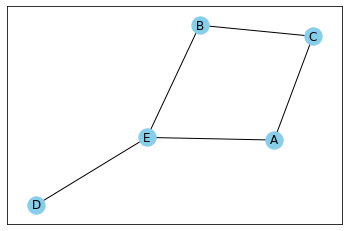

In [1]:
import networkx as nx
G = nx.Graph()


# This is the one we'll start with for this problem set
edges = \
"""
D E
E B
E A
C A
C B
"""
G = nx.parse_edgelist(edges.split('\n'))
nx.draw_networkx(G,node_color='skyblue')

**Q1**

Using `G` as draw above, write out the betweenness centrality calculation for node E, using the
definition of betweenness centrality for a node given in the
text chapter.

We reproduce that definition here, for convenience:

We define the **betweenness centrality** of node $j$, $\text{Betweenness}_{j}$ as

$$
   \begin{array}[t]{l}
   \text{Betweenness}_{j} = \sum_{i\neq j\neq k} \frac{\sigma_{ik}(j)}{\sigma_{ik}},
   \end{array}
$$

Here $\sigma_{ik}$ is the total number of shortest paths
from $i$ to $k$; and  $\sigma_{ik}(j)$ is the total
number of such paths which pass through $j$.  The expression
to the right of $\sum$ is proportion of all shortest paths
between $i$ and $k$ that pass through $j$.
The symbol $\sum$ indicates
we sum that quantity for various $i$ and $k$, and
the little subscript tells us $i\neq j\neq k$; that is, we find that quantity
for all distinct nodes $i,k$ in the graph that are different from $j$.

And we add up the results.  Roughly what we're calculating is: What proportion
of the shortest paths in the graph pass through $j$? Or what proportion
of the traffic taking a shortest path journey has to pass through $j$. 

To see an example of writing out the calculation (on a different graph!) 
look back at the textbook discussion.


In [2]:
betweenness = nx.betweenness_centrality(G)
print(f"Betweenness centrality of node E: {betweenness['E']}")

Betweenness centrality of node E: 0.5833333333333333


In [3]:
# Betweenness centrality on node E
B1 = nx.betweenness_centrality(G)
B_il1 = list(B1.items())
B_il1.sort(key=lambda x:x[1],reverse=True)
B_il1

[('E', 0.5833333333333333),
 ('B', 0.16666666666666666),
 ('A', 0.16666666666666666),
 ('C', 0.08333333333333333),
 ('D', 0.0)]

In [4]:
# Betweenness centrality for node E: 0.5833333333333333.

**Q2**

How does the betweenness computation for node E in G 
change if we add an edge between C and E as shown in the cell below?


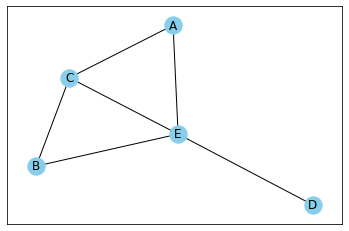

In [5]:
edges2 = \
"""
D E
E B
E A
C A
C B
C E
"""
G2 = nx.parse_edgelist(edges2.split('\n'))
nx.draw_networkx(G2,node_color='skyblue')

In [6]:
betweenness_G2 = nx.betweenness_centrality(G2)
print(f"Betweenness centrality of node E in G2: {betweenness_G2['E']}")

Betweenness centrality of node E in G2: 0.5833333333333333


In [7]:
# Betweenness centrality on node E
B2 = nx.betweenness_centrality(G2)
B_il2 = list(B2.items())
B_il2.sort(key=lambda x:x[1],reverse=True)
B_il2

[('E', 0.5833333333333333),
 ('C', 0.08333333333333333),
 ('D', 0.0),
 ('B', 0.0),
 ('A', 0.0)]

In [8]:
# Betweenness for node E didn't change at all. It's still 0.5833333333333333.

**Q3**

How does the betweenness computation for node E change if we add an edge between A  and B as shown in the cell below?

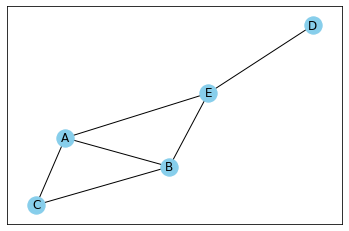

In [9]:
edges3 = \
"""
D E
E B
E A
C A
C B
A B
"""
G3 = nx.parse_edgelist(edges3.split('\n'))
nx.draw_networkx(G3,node_color='skyblue')

In [10]:
betweenness_G3 = nx.betweenness_centrality(G3)
print(f"Betweenness centrality of node E in G3: {betweenness_G3['E']}")

Betweenness centrality of node E in G3: 0.5


In [11]:
# Betweenness centrality on node E
B3 = nx.betweenness_centrality(G3)
B_il3 = list(B3.items())
B_il3.sort(key=lambda x:x[1],reverse=True)
B_il3

[('E', 0.5),
 ('B', 0.16666666666666666),
 ('A', 0.16666666666666666),
 ('D', 0.0),
 ('C', 0.0)]

In [12]:
# Betweenness for node E changed. It is 0.5.

**Q4** What is the **degree centrality** of node E in the graph in Question 2?
Show your calculation.  Use `networkx` to check your calculation (the `degree_centrality`
function is demoed un the using_networkx.ipynb notebook.)


In [13]:
D = nx.degree_centrality(G2)
D

{'D': 0.25, 'E': 1.0, 'B': 0.5, 'A': 0.5, 'C': 0.75}

In [14]:
print(f"Degree centrality of node E in G2: {D['E']}")

Degree centrality of node E in G2: 1.0


In [15]:
# Degree centrality for node E is 1.0.

**Q5** What is the clustering coefficient for node E in the graph in Question 2?
Show your calculation.
Use `networkx` to check your calculation.


The **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as
$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$
The notation $\text{N}_{i}$, read "neighbor set" as explained above, stands for the set of neighbors of $i$
Note that $i$ is not in the neighbor set $\text{N}_{i}$.

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** edges between
neighbors of $i$ divided by the maximum **possible** number of
edges between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.


In [16]:
cl = nx.clustering(G2,G2.nodes())
sum(cl.values())/len(cl)

0.5999999999999999

In [17]:
clustering_G2 = nx.clustering(G2, 'E')
print(f"Clustering coefficient of node E in G2: {clustering_G2}")

Clustering coefficient of node E in G2: 0.3333333333333333


**Q7** What is the average shortest path length in the graph in Question 2? 
Show your calculations.  Use networkx to check your calculations.
Look [here](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
in the `networkx` docs for a discussion of `nx.average_shortest_path_length`.

In [18]:
nx.average_shortest_path_length(G2)

1.4

### More on clustering coefficients

The next cell loads the Florentine Families Graph discussed in the new_using_networkx.ipynb notebook.
This graph is a famous graph of Florentine families (Padgett and Ansell 1993).

>Padgett, John F., and Christopher K. Ansell. "Robust Action and the Rise of the Medici, 1400-1434." American journal of sociology (1993): 1259-1319.

A link represents marriage between members of the families.
For a little background
on what the names and the graph mean, have a quick look at the Padgett and Ansell paper cited above (which is available [here](https://www.jstor.org/stable/pdf/2781822.pdf)), bearing in mind that this partiocular
graph is based on marriage alliances.

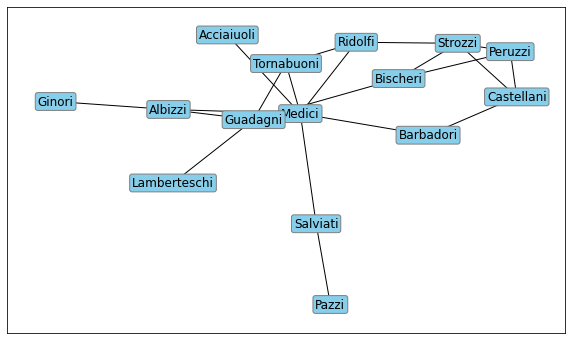

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6)) 

ff = nx.florentine_families_graph()

nx.draw_networkx(ff, with_labels=True, node_shape = 's', node_color="none", 
        bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'),
                )

 In the cells below we load two more graphs, Zachary's karate graph and a random graph



Using networkx, compute the clustering coefficent of all three graphs using `networkx`. 

>1. the karate graph;
>2. A random graph;  
>3. the Florentone families graph

Try to **guess** the clustering coefficient of the random graph even before you compute it.  Is the clustering coefficient of the karate graph higher or lower than that of the random graph? Is that what you expect given that social networks are small worlds?

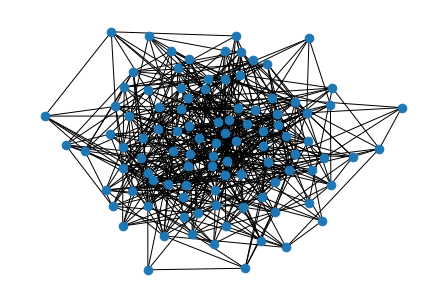

In [20]:
G = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(G,node_size=75)

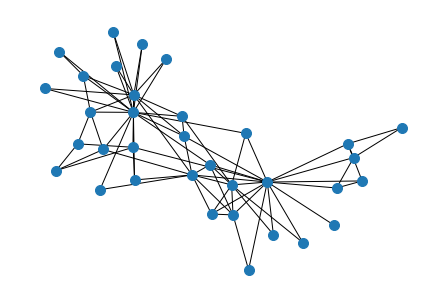

In [21]:
import networkx as nx

kn = nx.karate_club_graph()
nx.draw_spring(kn,node_size=100)

### Centrality

**Q8** 

Try using the betweenness centrality and degree centrality measures on the Florentine families graph.  These measures were illustrated in the new_using_networkx.ipynb notebook.  The two measures produce different centrality rankings.   Briefly describe the important differences between the two different centrality rankings
assigned to this graph. Be sure to sort your results for ease of comparison.   

In [22]:
for (nm,sc) in sorted(nx.betweenness_centrality(ff).items(),key=lambda x:x[1],reverse=True):
    print(f"{nm:<50} {sc:04.3f}")

Medici                                             0.522
Guadagni                                           0.255
Albizzi                                            0.212
Salviati                                           0.143
Ridolfi                                            0.114
Bischeri                                           0.104
Strozzi                                            0.103
Barbadori                                          0.093
Tornabuoni                                         0.092
Castellani                                         0.055
Peruzzi                                            0.022
Acciaiuoli                                         0.000
Pazzi                                              0.000
Ginori                                             0.000
Lamberteschi                                       0.000


In [23]:
for (nm,sc) in sorted(nx.degree_centrality(ff).items(),key=lambda x:x[1],reverse=True):
    print(f"{nm:<50} {sc:04.3f}")

Medici                                             0.429
Strozzi                                            0.286
Guadagni                                           0.286
Castellani                                         0.214
Peruzzi                                            0.214
Ridolfi                                            0.214
Tornabuoni                                         0.214
Albizzi                                            0.214
Bischeri                                           0.214
Barbadori                                          0.143
Salviati                                           0.143
Acciaiuoli                                         0.071
Pazzi                                              0.071
Ginori                                             0.071
Lamberteschi                                       0.071


In [24]:
nx.degree_centrality(ff)

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

In [25]:
# Betweenness centrality for a specific node is the proportion of the best paths between any pairs of nodes that pass through that specific node. 
# It depends on connection of every pair of nodes, excluding pairs with that specific node. (book)

In [26]:
# Degree centrality depends on the node's neighbors. The more neighbors the node has, the higher its degree dentrality. (book)
# (Number of neighbors) / (Maximum number of neighbors they could have)

In [27]:
# As we can see, the betweenness centrality and degree centrality measures produce different centrality rankings for the Florentine Families Graph. 
# The top nodes according to betweenness centrality are the Medici, Guadagni, and Albizzi families.
# while the top nodes according to degree centrality are the Medici, Strozzi, and Guadagni families.

#### Word Graph Section

We are going to build a graph that depicts letter-sharing relations in a group
of words then answer some questions about it.

In [28]:
import pandas as pd

graph_wds = ['shade', 'pooch', 'fling', 'brief', 'shank', 'juice',
             'boggy', 'sonny', 'parer', 'glogg', 'vague', 'extra',
             'chalk', 'spate', 'soppy', 'graph', 'prick', 'mixer',
             'steal', 'wages','quick']

rows = [[wd, let, i] for wd in graph_wds for (i,let) in enumerate(wd)]
df = pd.DataFrame(rows,columns=["Word","Letter","Position"])

In [29]:
df

,Word,Letter,Position
0,shade,s,0
1,shade,h,1
2,shade,a,2
3,shade,d,3
4,shade,e,4
...,...,...,...
100,quick,q,0
101,quick,u,1
102,quick,i,2
103,quick,c,3


Each row in `df` represents the occurrence of a letter in a word.
There are 105 rows because each of our 21 words has 5 letters.

We will build  a graph `G` whose nodes are the 21 words in `graph_wds`.  Here is
what the graph represents

>**Two words in `G` will be connected if and only if they share a letter**

`G` could be built without using pandas, but to improve our knowledge
of pandas grouping functionality, we sketch the code that builds the
graph using the `Dataframe` `df` constructed above.  

Your task for **Q1** below will be to write the code that actually builds the
graph.

**Q1 Write code building the letter-sharing graph G from the pandas df above.**

####  Step 1  Grouping the words into letter groups

The first step in building our graph `G` is to group the rows of `df` by the letter column.  This has been done for you in the cell below.

In [30]:
# Create the Series groupby object using df.  
# You can convert a groupby instance `gb` into a `SeriesGroupBy` instance by doing `gb[col_name]`
# We do that here so that the members of each group will be the words containing the group letter
let_gps = df.groupby('Letter')['Word']   

#### Getting a letter group

We illustrate what the groupby object looks like/does. In the following cells `cg` is a `SeriesGroupBy` instance created by the code above, where each group in `let_gps` corresponds to a letter (the only letter
not represented in ouyr data is *z*.

For example:

In [31]:
cg1_ser = let_gps.get_group('a')

In [32]:
type(cg1_ser)

pandas.core.series.Series

The `Series` `cg1_ser` contains the words in which `'a'` occurs.

In [33]:
cg1_ser

2     shade
22    shank
41    parer
51    vague
59    extra
62    chalk
67    spate
77    graph
93    steal
96    wages
Name: Word, dtype: object

In [34]:
len(cg1_ser)

10

So we want our graphg `G` to have one node for
each of the 10 words above and all of them should be
connected, because they all contain the letter `'a'`.
Since there are 45 word pairs: (10*9)/2,
we will need 45 edges  among the 10 words.

The 10-word subgraph of `G` looks like this:

complete_graph(10) Num nodes: 10 Num edges: 45


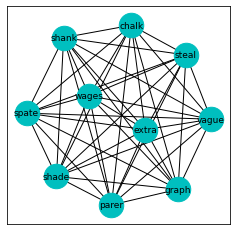

In [35]:
import networkx as nx
(fig,ax) = plt.subplots(1,1, figsize=(4,4))

decad0 = nx.complete_graph(10)
lbls = dict(enumerate(cg1_ser.values))
decad = nx.relabel_nodes(decad0,lbls)
print(f"complete_graph(10) Num nodes: {len(decad)} Num edges: {decad.number_of_edges()}")
nx.draw_networkx(decad,ax=ax,node_color='c',font_size=9,node_size=600)

#### How to loop through all the letter groups

The `SeriesGroupBy` instance  `let_gps` is an iterable generating pairs of the form `(let, Ser)`, where  `Ser` is a `pandas Series` containing the group words with `let`. All those words need to be in `G`, and  they all need to be connected in `G`. 

We illustrate how to enumerate all the word groups by looping through the first
two groups in `let_gps`:

In [36]:
j = 1
for (i,g) in  enumerate(let_gps):
    # g is a tuple of length 2
    print(len(g))
    # letter from group tuple
    print(g[0])
    # Word group from group tuple: The letter a occurs in 10 words.
    print(type(g[1]),len(g[1]))
    # the entire word group. 
    print(g[1])
    # Example stopped after looking at just j+1 groups (letters) 
    if i == j:
        break

2
a
<class 'pandas.core.series.Series'> 10
2     shade
22    shank
41    parer
51    vague
59    extra
62    chalk
67    spate
77    graph
93    steal
96    wages
Name: Word, dtype: object
2
b
<class 'pandas.core.series.Series'> 2
15    brief
30    boggy
Name: Word, dtype: object


#### Finding all pairs in a sequence

A useful way of looking at it for writing the code is to pair each word with all the words below it in 
a word group; using the *a* group above as an example: *shade*
gets paired with 9 other words; *shank* gets paired with 8 others
(it's already paired with *shade*); *parer* gets paired
with 6 others, and so on until *steal* gets paired with *wages*. \
The number of pairs is the number of edges we need to add to the graph 
and that number is:

In [37]:
9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1

45

The key computational point is that it works to pair
each word with the words below it on the cast list, and
add an edge for each pair. This works because
when you add the edge 

```
(`shade`, `shank`)
```

there is no longer any point in adding the edge

```
(`shank`, `shade`).
```

It's an undirected Graph (no arrows on the edges), so
these are the same edge; `networkx` enforces this,
as is demonstrated in the next cell.

In [38]:
# Making an empty undirected Graph
G = nx.Graph()
print(f"Num edges: {G.number_of_edges()}")
G.add_edge('shade', 'shank')
print(f"Num edges: {G.number_of_edges()}")
## You can retry after commenting out the next line. Both tuples are still in G.
G.add_edge('shank', 'shade')
print(f"Num edges: {G.number_of_edges()}")
print(('shade', 'shank') in G.edges)
print(('shank', 'shade') in G.edges)

Num edges: 0
Num edges: 1
Num edges: 1
True
True


#### Step 2 Making the word graph

Start with an empty graph:

```
G = nx.Graph()
```

You are going  to build a list of edges (elist) that you ultimately add to
G, using `G.add_edges_from(...)`.

Loop though  `let_gps`:

```
for (let,S1) in  let_gps:
```

On each step of the loop, you find a series `S1` containing the words
that share  the letter `let`.  Each pair of words in `S1` -- for instance, `('vague','wages')` -- 
is an edge you want to add to G.  So add these pairs to `elist`.

Havong constructed the list of word pairs, 
you will find the `G.add_edges_from(...)` method, illustrated below, useful.
Note that `elist` should contain pairs of strings.  Each string should be a word from `graph_words`.

G: 4 nodes 5 edges


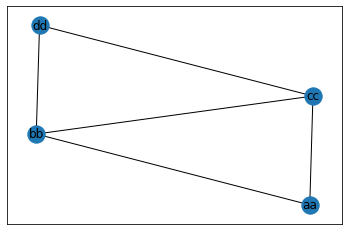

In [39]:
G0 = nx.Graph()
G0.add_edges_from([("aa","bb"),("cc","aa"),("dd","cc"),("bb","cc",),("bb","dd")])
print(f"G: {len(G0)} nodes {len(G0.edges)} edges")
nx.draw_networkx(G0)

**Your answer in the next cell:**

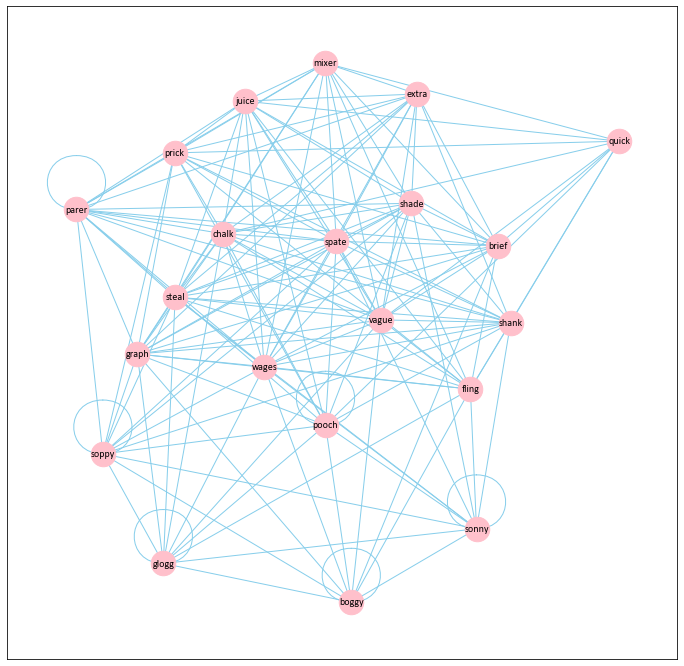

In [40]:
import networkx as nx
from collections import defaultdict
from nltk import FreqDist

let_gps = df.groupby('Letter')['Word']
edges = []

GG = nx.Graph()
for let, words in let_gps: # Check each letter group
    for i, word1 in enumerate(words): # Check each word in the group
        for word2 in words[i+1:]:
            GG.add_edge(word1, word2) # Add an edge for each pair of words that share the letter
                    
# GG = nx.Graph()
# GG.add_edges_from(edges)
plt.figure(figsize=(12, 12)) # Adjust figure size
pos = nx.spring_layout(GG, k=0.5, seed=42)
nx.draw_networkx_nodes(GG, pos, node_size=600, node_color='pink')
nx.draw_networkx_edges(GG, pos, edge_color='skyblue')
nx.draw_networkx_labels(GG, pos, font_size=10, font_family='calibri')
plt.show()

In [41]:
len(GG.edges()),len(GG)

(149, 21)

If you've constructed the graph `G2` correctly, it should have 149 edges and 21 nodes.

In [42]:
len(G2.edges()),len(G2)

(6, 5)

If your graph-constructing 
code is not working properly, execute the following cell to define `G` so that you can continue
with the rest of the questions:

In [43]:
import networkx as nx
import urllib.request
import os.path

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
word_graph_url = os.path.join(github_networks_data, 'social_networks_assignment_word_graph.gml')

G2 = url_fetch_networkx_graph (word_graph_url)

In [44]:
len(G2.edges()),len(G2)

(149, 21)

**Q2** Draw your letter graph with labels to show the words.  To get your labels
to show up nicely you should look at the networkx notebook and modify the
code that draws the Florentine Families Graph with `node_shape='s'` and a
`bbox` argument.

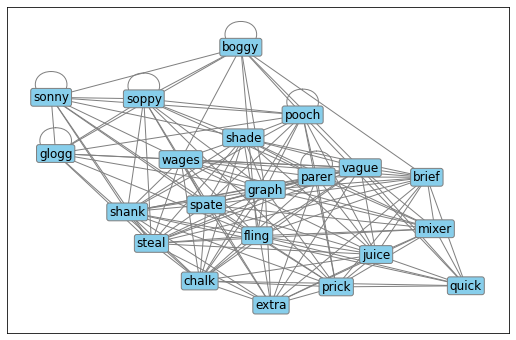

In [61]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,6)) 

# plt.figure(figsize=(12, 12)) # Adjust figure size
# pos = nx.spring_layout(GG, k=0.5, seed=42)
# nx.draw_networkx_nodes(GG, pos, node_size=600, node_color='pink')
# nx.draw_networkx_edges(GG, pos, edge_color='skyblue')
# nx.draw_networkx_labels(GG, pos, font_size=10, font_family='calibri')
# plt.show()

# ff = nx.florentine_families_graph()

nx.draw_networkx(GG, node_size=800, with_labels=True, node_shape = 's', node_color="none", edge_color='gray',
        bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'),
                )

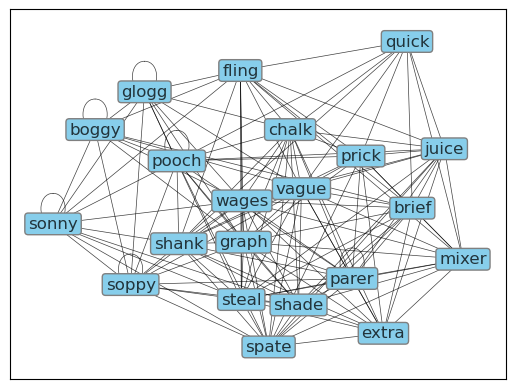

In [ ]:
##  Your code goes here.  The graph looks like the one below.

**Q3**   Use the graph as a dictionary to retrieve all the nodes connected to `"quick"`.
(NB:  You can do this with `G2.neighbors('quick')` but use `G2` as a dictionary instead).

In [72]:
G_dict = nx.to_dict_of_lists(GG)
# print(G_dict)
GG_neighbors = G_dict['quick']
GG_neighbors

['pooch',
 'juice',
 'chalk',
 'prick',
 'fling',
 'brief',
 'mixer',
 'shank',
 'vague']

In [ ]:
# Your code goes here.  The output looks like the output below.

AtlasView({'pooch': {'weight': 1}, 'juice': {'weight': 3}, 'chalk': {'weight': 2}, 'prick': {'weight': 3}, 'fling': {'weight': 1}, 'brief': {'weight': 1}, 'mixer': {'weight': 1}, 'shank': {'weight': 1}, 'vague': {'weight': 1}})

**Q3** Find the three words with the highest betweenness centrality in `G`.

In [90]:
sorted_vals = sorted(nx.betweenness_centrality(GG).items(), key=lambda x:x[1], reverse=True)[:3] # Sort the tuples by the betweenness centrality value and get the top 3
# print(sorted_vals)
item_list = [(word, betweenness) for word, betweenness in sorted_vals] # List comprehension
item_list

[('wages', 0.030378276694066165),
 ('graph', 0.02860218728639781),
 ('vague', 0.02694886984360669)]

In [ ]:
#  Your code will create the betweenness centrality dictionaryu for G abd sort
#  its itemlist

[('wages', 0.030378276694066165),
 ('graph', 0.02860218728639781),
 ('vague', 0.02694886984360668)]

**Q3** Find the three words with the highest degree centrality in `G`.

What word has the lowest degree centrality?

In [92]:
sorted_vals_deg = sorted(nx.degree_centrality(GG).items(), key=lambda x:x[1], reverse=True)[:3] # Sort the tuples by the betweenness centrality value and get the top 3
# print(sorted_vals)
item_list_deg = [(word, betweenness) for word, betweenness in sorted_vals_deg] # List comprehension
sorted_vals_deg

[('parer', 0.8500000000000001),
 ('graph', 0.8500000000000001),
 ('wages', 0.8500000000000001)]

In [96]:
lowest = sorted(nx.degree_centrality(GG).items(), key=lambda x:x[1], reverse=True)[-1]
lowest

('quick', 0.45)

In [ ]:
# Same as for last problemn but with degree_centrality instead of betweenness centrality.
# And find the word that ranks lowest too.

[('parer', 0.8500000000000001), ('graph', 0.8500000000000001), ('wages', 0.8500000000000001)]

('quick', 0.45)


**Q4** What is the average clustering coefficient of `G`?  How does it compare to the
average clustering coefficient of the social network graphs Florentine Families and
Zachary's Karate Club (computed in a previous problem).

In [100]:
# Our graph
cl_GG = nx.clustering(GG,GG.nodes())
sum(cl_GG.values())/len(cl_GG)

0.7212410216611895

In [101]:
# Florentine Families graph
cl_ff = nx.clustering(ff,ff.nodes())
sum(cl_ff.values())/len(cl_ff)

0.16

In [102]:
# Florentine Families graph
cl_kn = nx.clustering(kn,kn.nodes())
sum(cl_kn.values())/len(cl_kn)

0.5706384782076823

In [104]:
# As we can wee, words graph has the highest clustering coefficient. The nodes in that graph are likely to be neighbors of each other.

In [ ]:
##  Your code here

### Extra Credit

**Extra Credit One**  Modify your code for creating the word graph in the **Word Graph Section** so that edges are **weighted**.  The weight attribute of an edge should represent the number of letters shared by two words
the edge connects; "wages" and "vague" share three letters, "a", "g" and "e", so the weight of the edge connecting them should be 3. (See the example below).

Hint: Take a look at `elist` and try to understand why there are duplicates.
You may also want to look at `nltk.FreqDist` and/or `nx.set_edge_attributes`.

To illustrate: after you succeed, each edge will have a weight attribute. The attribute dictionary
of an edge can be accessed as follows:

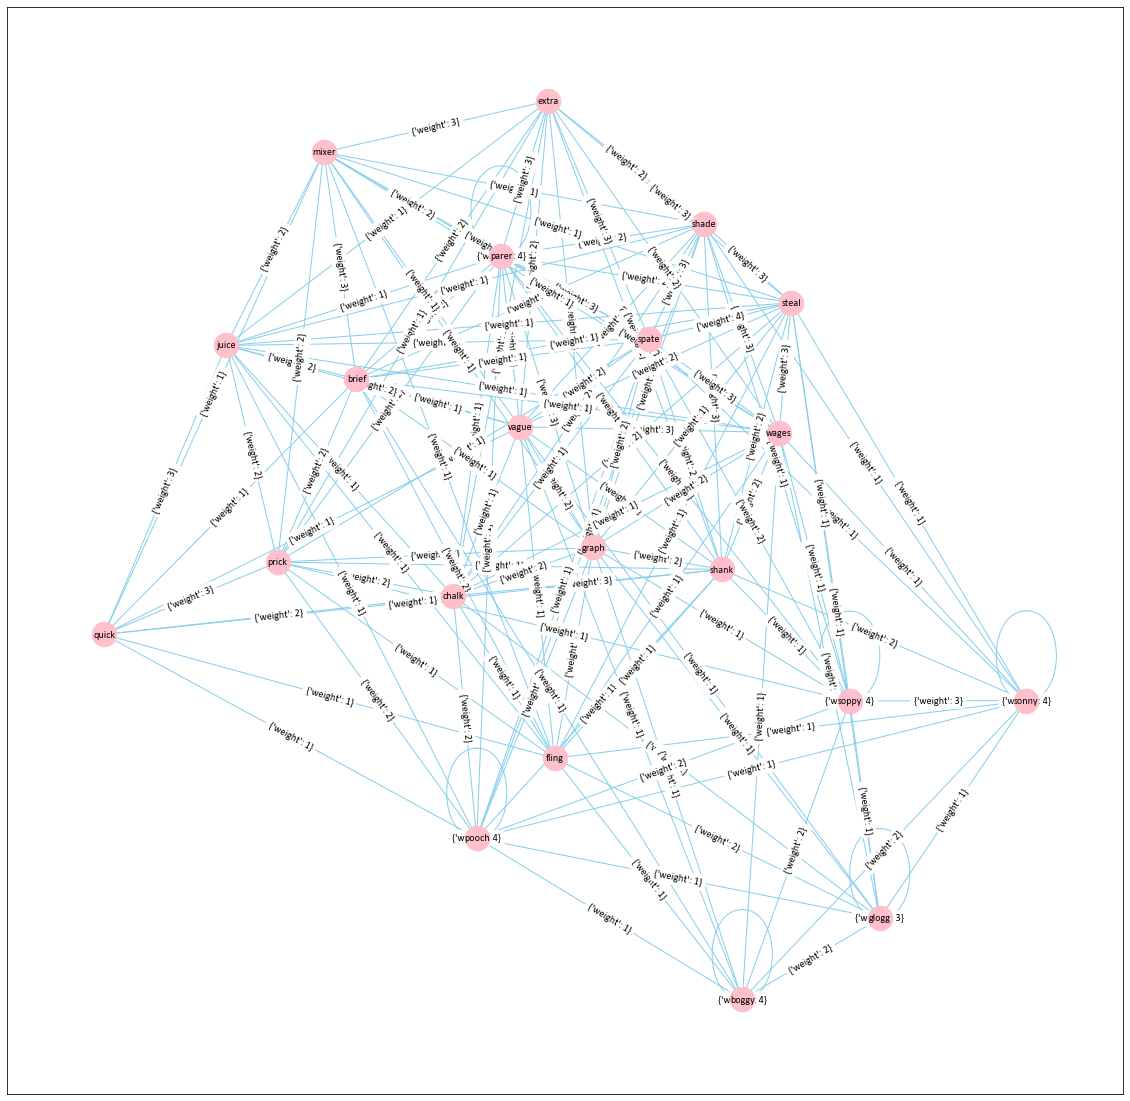

In [132]:
import networkx as nx
from collections import defaultdict
from nltk import FreqDist

# let_gps = df.groupby('Letter')['Word']/]
edges = []

# Basically reusing the code before
G2 = nx.Graph()
for let, words in let_gps:
    for i, word1 in enumerate(words):
        for word2 in words[i+1:]:
            shared_letters = set(word1) & set(word2)
            weight = len(shared_letters) # Weight represents the number of shared letters, intersection of 2 sets
            if weight > 0:
                G2.add_edge(word1, word2, weight=weight)

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G2, k=0.5, seed=42)
nx.draw_networkx_nodes(G2, pos, node_size=600, node_color='pink')
nx.draw_networkx_edges(G2, pos, edge_color='skyblue')
nx.draw_networkx_edge_labels(G2, pos, font_size=10, font_family='calibri')
nx.draw_networkx_labels(G2, pos, font_size=10, font_family='calibri')
plt.show()
# It is a messy graph, but I wanted to show it

In [115]:
G2['wages']['vague']

{'weight': 3}

In [ ]:
G2['wages']['vague']

{'weight': 3}

And of course to look up the weight of an edge:

In [116]:
G2['wages']['vague']['weight']

3

In [ ]:
G2['wages']['vague']['weight']

3

This extra credit problem is worth 5 midterm points.  That is, I will add 5 points to your midterm score
if you do this problem correctly.  If you already have a perfect score on the midterm, this extra
credit problem cannot improve your grade. Note:  If you used a downloaded version of the graoh
to do the word graph section, you can get credit for this extra credit problem.

**Extra credit problem 2**.  Redraw your graph to use your edge weights to affect the drawing in one of two ways.  Either have your edge thicknesses determined by your edge weights, or have your edge colors determined by your edge weights. Fir the latter option you will need to use a **color map**.  For true bliss, do both.  This problem is worth another 5 midterm points.   If your midterm score is already equal to 104, doing this problem cannot improve your grade.  Hint:  Read some documentation.  Do some stackoverflow searches.  Review customizing your graph drawing.   Note:  If you used a downloaded version of the graoh
to do the word graph section, you can still get credit for this extra credit problem because the
downloaded version of the graph (called `G2` above) does have edge weights.

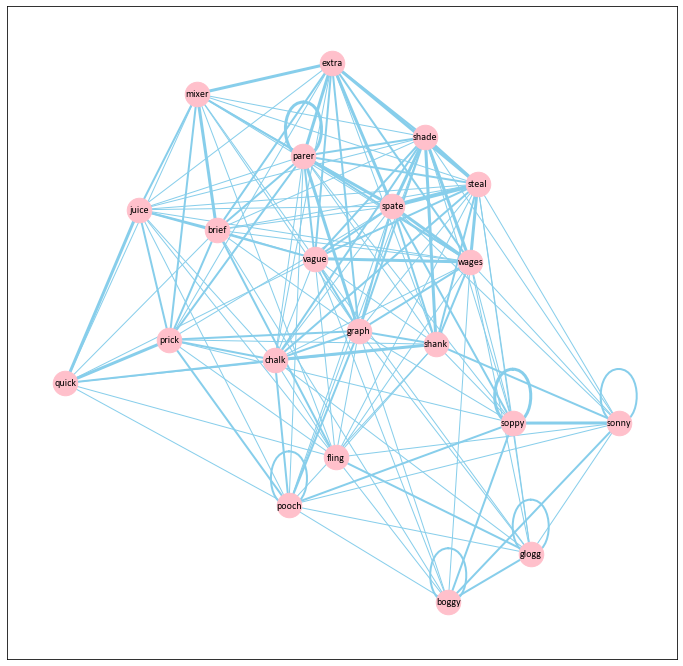

In [143]:
plt.figure(figsize=(12, 12)) # Adjust figure size
pos = nx.spring_layout(G2, k=0.5, seed=42)

# Just managed to get edge thicknesses
thickness = [k['weight'] for (i,j,k) in G2.edges(data=True)]
nx.draw_networkx_edges(G2, pos, edge_color='skyblue', width=thickness)

# Reusing the same code
nx.draw_networkx_nodes(G2, pos, node_size=600, node_color='pink')
nx.draw_networkx_labels(G2, pos, font_size=10, font_family='calibri')
plt.show()

**Extra credit problem 3:**  Modify your graph creation code so that  the weight  of the edge connecting 
two words is not affected by duplicate letters in either of the words.  Consider the following
edge weight:

In [158]:
# let_gps = df.groupby('Letter')['Word']/]
edges = []

# Basically reusing the code before
G_modified = nx.Graph()
for let, words in let_gps:
    for i, word1 in enumerate(words):
        for word2 in words[i+1:]:
            shared_letters = set(word1) & set(word2)
            weight = len(shared_letters) # Weight represents the number of shared letters, intersection of 2 sets
            if weight > 0:
                G_modified.add_edge(word1, word2, weight=weight)

In [159]:
G_modified["glogg"]['boggy']

{'weight': 2}

In [160]:
G_modified['wages']['vague']['weight']

3

In [161]:
# My code ignored duplicate letters in extra problem 1, so I just copied the same code from the cell above.
#  Overweight edges are avoided by using the intersection of 2 sets.

This is the answer returned by the simplest approach to computing edge weights (based
on the edge counts in `elist`).  Modify your code so that duplicate letters are ignored in
computing edge weights and the weight of the edge above (if you called your graph `G3`) is:

```
>>> G3["glogg"]['boggy']
{'weight': 2}
```

Since the only shared latters, not counting duplicates, are "g" and "o". Note that
all the weights involving words with no duplicate letters
should be unchaged:

```
>>> G3['wages']['vague']['weight']
3
```

If you have already
done this, you can get credit for this problem by explaining how your code avoids
overweight edges due to duplicate letters. This problem is worth another 5 midterm points.   If your midterm score is already equal to 104, doing this problem cannot improve your grade. Note:  If you used a downloaded version of the graoh to do the word graph section, you can still get credit for this extra credit problem by modifying the edge
weights in `G2`, which you downloaded.  Use 
`nx.get_edge_attributes` and `nx.set_edge_attributes`.  You will have to do a computation that computes the
correct edge weight for each word pair and then set  the edge attributes of `G2` to the corrected version.